<a href="https://colab.research.google.com/github/Valseb22/TF_training/blob/main/CNN_paneaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset

Populating the interactive namespace from numpy and matplotlib
Shape of the image (1669,)


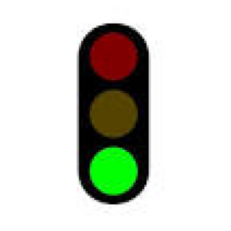

Shape of the image (2249,)


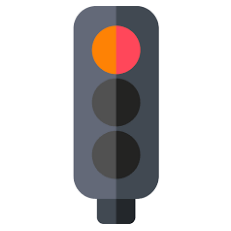

In [2]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import pathlib
import os


%pylab inline

url_green = r'https://github.com/Valseb22/TF_training/blob/main/CNN/green.jpeg?raw=true'
resp = requests.get(url_green, stream=True).raw
image_array_green = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_green.shape}')
image_green = cv2.imdecode(image_array_green, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_green, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_red = r'https://github.com/Valseb22/TF_training/blob/main/CNN/red.png?raw=true'
resp = requests.get(url_red, stream=True).raw
image_array_red = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_red.shape}')
image_red = cv2.imdecode(image_array_red, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_red, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:

data_dir = tf.keras.utils.get_file(
    "Dataset.zip",
    "https://github.com/Valseb22/TF_training/blob/main/CNN/Dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/Dataset')
print(data_dir)
print(os.path.abspath(data_dir))

1202266/1202266 [==============================] - 0s 0us/step
/content/datasets/Dataset
/content/datasets/Dataset


In [4]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

217


In [5]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 217 files belonging to 2 classes.
Using 174 files for training.
Found 217 files belonging to 2 classes.
Using 43 files for validation.
['green_light', 'red_light']


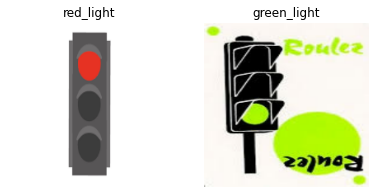

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(256,4,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=10,
  callbacks=[tensorboard_callback]
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


58/58 [==============================] - 165s 3s/step - loss: 0.6421 - accuracy: 0.5632 - val_loss: 0.4894 - val_accuracy: 0.8605
Epoch 2/10
58/58 [==============================] - 170s 3s/step - loss: 0.4664 - accuracy: 0.8448 - val_loss: 0.3616 - val_accuracy: 0.9070
Epoch 3/10
58/58 [==============================] - 163s 3s/step - loss: 0.3854 - accuracy: 0.8621 - val_loss: 0.2814 - val_accuracy: 0.9535
Epoch 4/10
58/58 [==============================] - 163s 3s/step - loss: 0.3191 - accuracy: 0.8908 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 162s 3s/step - loss: 0.2190 - accuracy: 0.8851 - val_loss: 0.0854 - val_accuracy: 0.9767
Epoch 6/10
58/58 [==============================] - 161s 3s/step - loss: 0.1769 - accuracy: 0.9368 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 7/10
58/58 [==============================] - 163s 3s/step - loss: 0.2282 - accuracy: 0.8966 - val_loss: 0.3059 - val_accuracy: 0.9302
Epoch 8/10
58/58 [======

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 256)     12544     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 128)       524416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        1

Saving téléchargement (8).jpeg to téléchargement (8).jpeg


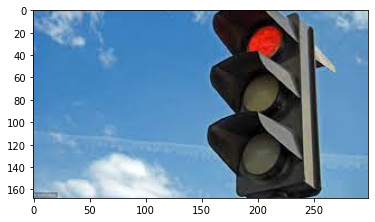

1/1 [==============================] - 0s 219ms/step
[[0.08863026 0.91136974]]
[[0 1]]


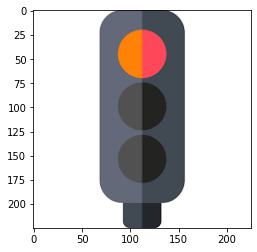

IT'S A RED LIGHT !


In [22]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = (model.predict(img_to_predict) > 0.5).astype("int32")
    print(model.predict(img_to_predict))
    print(res)
    if res[0,0] == 1:
        plt.imshow(cv2.cvtColor(image_green, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A GREEN LIGHT !")
    elif res[0,0] == 0 :
        plt.imshow(cv2.cvtColor(image_red, cv2.COLOR_BGR2RGB))
        plt.show()
        print("IT'S A RED LIGHT !")